# Math 104C Homework 3
**Name.** <span style="color:red">Kelly Wang</span> <br>
**Id.** <span style="color:red">5351010</span>

## Exercise 1
#### (a)
Given the initial-boundary value problem for the Heat Equation: 
$$u_t = \sigma u_{xx} \quad 0<x<\pi \\ \sigma > 0, \quad u(0,t) = u(pi,t) = 0.$$ <br/>
and 
$$ u_0(x) = \begin{cases} 
          x & 0\leq x \leq \pi/2, \\
          \pi-x & \pi/2\leq x\leq \pi,
       \end{cases}
$$
<br/><br/>
From the FD notes on page 4, we have $u(t,x) = \sum\limits_{m=1}^{\infty}b_m e^{-\sigma m^2 t}\sin(mx)$ but $u(0,x) = u_0(x) \implies u_0(x) = \sum\limits_{m=1}^{\infty}b_m\sin(mx) \implies b_m, m = 1,2,\dots$ are the sine coeffs of $u_0(x)$ ie $b_m = \frac{2}{\pi}\int_0^\pi u_0(x)\sin(mx)dx$. Applying the given boundary conditions we can write $b_m$ as a piecewise integral.
$$\begin{align}
b_m &= \frac{\pi}{2}\int_0^{\frac{2}{\pi}}u_0(x)\sin(mx)dx + \frac{\pi}{2}\int_{\frac{2}{\pi}}^{\pi}u_0(x)\sin(mx)dx\\
&= \frac{2}{\pi}\int_0^{\frac{2}{\pi}}x\sin(mx)dx + \frac{\pi}{2}\int_{\frac{2}{\pi}}^{\pi} \pi - x\sin(mx)dx\\
&= \frac{2}{\pi}\left(\frac{2\sin(\frac{\pi m}{2}) - \pi m\cos(\frac{\pi m}{2})}{2m^2}\right) + \frac{2}{\pi}\left(\frac{2\sin(\frac{\pi m}{2}) + \pi m \cos(\frac{\pi m }{2})}{2m^2} - \frac{\sin(\pi m)}{m^2}\right)
\end{align}$$
<br/><br/>

Next, we can break up and simplify our $b_m$ by its parity: 
$$ b_m = \begin{cases} 
          0 \quad \quad & \text{ if  } m = 4k, \\
          \frac{4}{\pi m^2} \quad & \text{ if  } m = 4k+1, \\
          - \frac{4}{\pi m^2} \quad & \text{ if  } m = 4k+3 
       \end{cases}
$$
for $k \in \mathbb{Z}$
<br/><br/>


Substitute simplified $b_m$:
$$u(x,t) = \frac{4\sin(x)e^{-\sigma t}}{\pi} - \frac{4\sin(3x)e^{-9\sigma t}}{9\pi} + \frac{4\sin(5x)e^{-25\sigma t}}{25\pi} - \frac{4\sin(7x)e^{-49\sigma t}}{49\pi} + \frac{4e^{-81\sigma t}}{81\pi} -\dots$$ <br/>
or <br/>

$$u(x,t) = \sum\limits_{m=1}^{\infty}(-1)^m \frac{4\sin((2m+1)x)e^{-(2m+1)^2 \sigma t}}{\pi(2m+1)^2}$$


#### (b) 


[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.  ]
alpha:  60.18478308354863


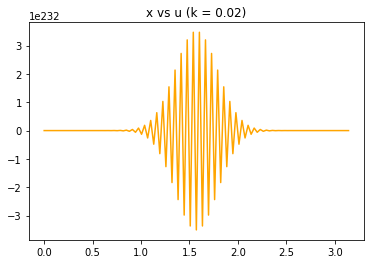

alpha:  0.5958293525271315


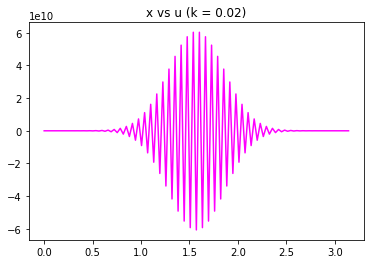

alpha:  0.5064549496480617


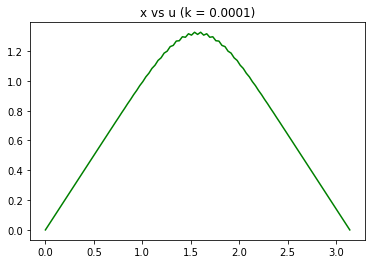

alpha:  0.029791467626356576


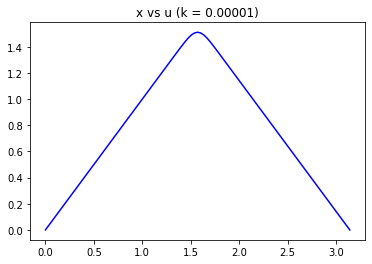

alpha:  0.002979146762635657


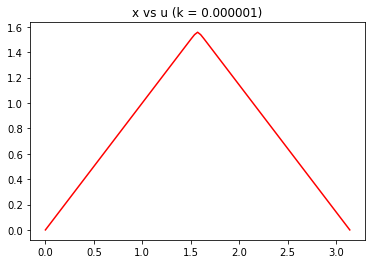

alpha:  0.0002979146762635657


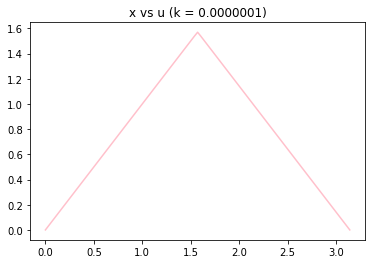

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import timeit

#initial conditions
def I(x): 
    if 0 <= x <= np.pi/2:
        return x 
    elif np.pi/2 <= x <= np.pi:
        return np.pi - x

def FEHeat(k,x,sigma, N, M):
    dh    = np.pi/(M-1) #h value
    dt    = T/(N-1) #k value
    scale = (sigma*k)/dh**2
    print("alpha: ", scale)
    u     = np.zeros(M+1)
    u_1   = np.zeros(M+1)
    
    for i in range(0, M+1):
        u_1[i] = I(x[i])
        
    for n in range(0, N):
        for i in range(1, M):
            u[i] = scale*u_1[i-1] +(1-2*scale)*u_1[i]+scale*u_1[i+1]
            
        u[0] = 0
        u[M] = 0
            
        u_1, u = u, u_1
    
    return u

N = 100
M = 100
T = 2
L = np.pi
t = np.linspace(0, T, N+1) #mesh points in time
x = np.linspace(0, L, M+1) #mesh points in space
print(t)
sigma = 3

k = T/(N-1)
u = FEHeat(k, x,sigma,N,M)
plt.plot(x,u,color= "orange")
plt.title("x vs u (k = 0.02)")
plt.show()

k = 0.0002
u = FEHeat(k, x,sigma,N,M)
plt.plot(x,u,color= "magenta")
plt.title("x vs u (k = 0.02)")
plt.show()

k = 0.00017
u = FEHeat(k, x,sigma,N,M)
plt.plot(x,u,color= "green")
plt.title("x vs u (k = 0.0001)")
plt.show()

k = 0.00001
u = FEHeat(k, x,sigma,N,M)
plt.plot(x,u,color= "blue")
plt.title("x vs u (k = 0.00001)")
plt.show()


k = 0.000001
u = FEHeat(k, x,sigma,N,M)
plt.plot(x,u,color= "red")
plt.title("x vs u (k = 0.000001)")
plt.show()

k = 0.0000001
u = FEHeat(k,x,sigma,N,M)
plt.plot(x,u,color= "pink")
plt.title("x vs u (k = 0.0000001)")
plt.show()

        
        

From these plots, it seems like the smaller the $k$ value the more stable the scheme is. We can clearly see the discrepancies of the plots between $k = 0.02$ and $k = 0.0000001$. This leads me to believe that a possible $\alpha$ for which the scheme is stable would be $\frac{\sigma 0.0000001}{\frac{\pi^2}{99}}$ and one possible unstable $\alpha$ would be $\frac{\sigma 0.02}{\frac{\pi^2}{99}}$. In other words, $\alpha = 0.55$ is unstable, and $\alpha = 0.4$ is stable. 

## Exercise 2
#### (a) 
Given the backward time difference method 
$$\frac{u_j^{n+1} - u_j^n}{k} = \sigma \frac{u_{j-1}^{n+1}-2u_{j}^{n+1} + u_{j+1}^{n+1}}{h^2}$$
Let $\alpha = \sigma \frac{k}{h^2}$ and substitute $u_j^n = g^ne^{imjh}$:
$$
\begin{align}
u_j^{n+1}  - u_j^n &= \alpha\left(u_{j-1}^{n+1}-2u_{j}^{n+1}+u_{j+1}^{n+1}\right)\\
u_j^{n+1} - g^ne^{imjh} &= \alpha\left(u_{j-1}^{n+1} - 2u_j^{n+1} + u_{j+1}^{n+1}\right)\\
u_j^{n+1} &= g^ne^{imjh} + \alpha \left(u_{j-1}^{n+1} - 2u_j^{n+1} + u_{j+1}^{n+1}\right)\\
g^{n+1}e^{imjh} &= g^ne^{imjh}+\alpha \left(g^{n+1}e^{im(j-1)h} - 2g^{n+1}e^{imjh} + g^{n+1}e^{im(j+1)h}\right)
\end{align}
$$

Cancel out $g^ne^{imjh}$:
$$
\begin{align}
g &= 1 + \alpha\left(ge^{-imh} ge^{imh} -2\right)\\
1 &= \frac{1}{g} + \alpha\left(e^{-imh} + e^{imh} -2\right)\\
\frac{1}{g} &= 1 - \alpha\left(e^{-imh} + e^{imh} -2\right)\\
g &= \frac{1}{1-\alpha\left(e^{-imh} + e^{imh} -2\right)}\\
g &= \frac{1}{1-2\alpha\left(cosmh -1\right)}\\
g &= \frac{1}{1+2\alpha(1-cosmh)} \quad \leq 1 \quad \forall m \in \mathbb{Z}
\end{align}
$$
By using Von Neumann analysis we can see that $|g| \leq 1 \quad \forall \alpha \implies$ method is unconditionally stable. 

[0.         0.02020202 0.04040404 0.06060606 0.08080808 0.1010101
 0.12121212 0.14141414 0.16161616 0.18181818 0.2020202  0.22222222
 0.24242424 0.26262626 0.28282828 0.3030303  0.32323232 0.34343434
 0.36363636 0.38383838 0.4040404  0.42424242 0.44444444 0.46464646
 0.48484848 0.50505051 0.52525253 0.54545455 0.56565657 0.58585859
 0.60606061 0.62626263 0.64646465 0.66666667 0.68686869 0.70707071
 0.72727273 0.74747475 0.76767677 0.78787879 0.80808081 0.82828283
 0.84848485 0.86868687 0.88888889 0.90909091 0.92929293 0.94949495
 0.96969697 0.98989899 1.01010101 1.03030303 1.05050505 1.07070707
 1.09090909 1.11111111 1.13131313 1.15151515 1.17171717 1.19191919
 1.21212121 1.23232323 1.25252525 1.27272727 1.29292929 1.31313131
 1.33333333 1.35353535 1.37373737 1.39393939 1.41414141 1.43434343
 1.45454545 1.47474747 1.49494949 1.51515152 1.53535354 1.55555556
 1.57575758 1.5959596  1.61616162 1.63636364 1.65656566 1.67676768
 1.6969697  1.71717172 1.73737374 1.75757576 1.77777778 1.79797

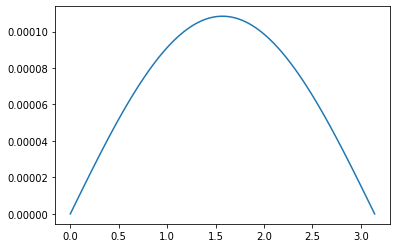

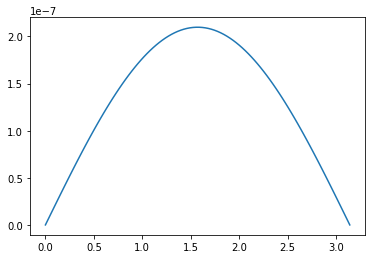

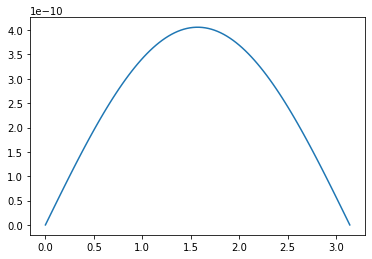

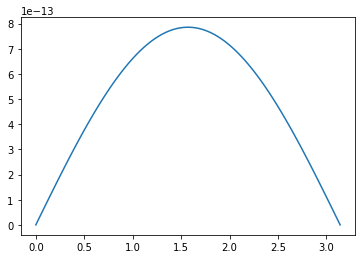

In [175]:
#u[i] = -scale*u_1[i-1] +(1+2*scale)*u_1[i]-scale*u_1[i+1]
def BEHeat(x,k,sigma,N,M,t):
    dh = k
    scale=(sigma*k)/dh**2
    A=np.zeros((M-2,M-2))
    for i in range(0,M):
        #update x to be used
        x[i]=I(x[i])
    x = x[1:M-1]
    result = []
    for i in range(len(t)):
        for i in range(0,M-2):
            #form tridiag matrix 

            A[i][i]=1+2*scale
            if i == 0:
                A[i][i+1] = -scale
            elif i == M-2:
                A[i][i-1] = -scale 
            else:
                A[i][i-1]= -scale
                A[i-1][i]= -scale
        for i in range(N+1):
            if i == 0:
                u_next = x
            else:
                #solving for u_n+1
                u_next=np.linalg.solve(A,x)
                x = u_next

        u_next = np.insert(u_next, 0, 0)
        u_next = np.insert(u_next, len(u_next), 0)
        result.append(u_next)
    return result

N = 100
M = 100
T = 2
L = np.pi
t = np.linspace(0, T, N) #mesh points in time
x = np.linspace(0, L, M) #mesh points in space
x2 = np.linspace(0, L, M)
sigma = 1
print(t)


k = np.pi/(M-1)
u = BEHeat(x, k, sigma, N, M, t)

for i in range(1,5):
    plt.plot(x2, u[i*2])
    plt.show()
    
plt.show()



<!-- I tried using the pseudocode on page 62 to make my own tridiagonal solver but could not figure it out unfortunately. I hope using 
np.linalg.solve -->

<!-- asdfasdfasdf -->

<!-- hello  -->

<!-- hello  -->

I tried following the pseudocode on page 62 to write my own tridiagonal solver but was unsuccessful, instead I used `np.linalg.solve()` I hope the yield between these two methods aren't too drastic. <br/><br/>
From the plots we can see that Backward Euler is unconditionally stable and Forward Euler is conditionally stable. In Backward Euler, all the results seem unchanged from eachother. Forward Euler blows up with  since all results seem unchanged, and Forward Euler is conditionally stable The results from Backward Euler seems to be very similar to eachother which lead me to believe this is unconditionally stable where as Forward Euler in problem 1 seems to blow up with $\alpha > 0.5$, conditionally stable.